In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
!pip install qiskit

# How the Bloch sphere looks like.

Also, you can benefit from a cool visualization at https://javafxpert.github.io/grok-bloch/
These are simple pure $|0\rangle$ and superposed $|+\rangle$ states.

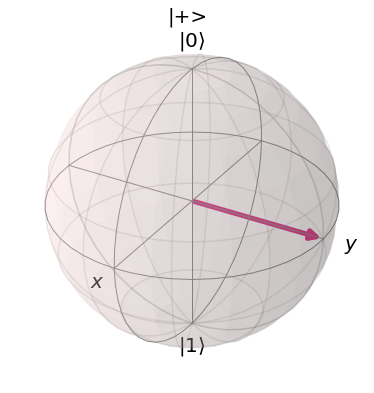

In [3]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector

x, y, z = 0, 0, 1
plot_bloch_vector([x, y, z], title="|0>")
plt.show()
x, y, z = 0, 1, 0
plot_bloch_vector([x, y, z], title="|+>")

## State vector representation

There are multiple visualization ways, please refer to [draw() documentation]( https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.draw.html#qiskit.quantum_info.Statevector.draw)

<IPython.core.display.Latex object>

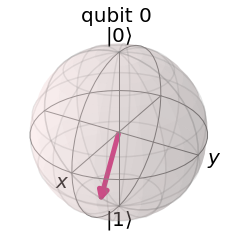

In [4]:
import qiskit
sv = qiskit.quantum_info.random_statevector(2)
display(sv.draw(output='latex'))
sv.draw(output='bloch')

In [5]:
sv.probabilities()

array([0.31112859, 0.68887141])

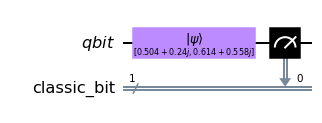

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
# define a quantum register with a single qubit
q = QuantumRegister(1, "qbit")

# define a classical register with a single bit
c = ClassicalRegister(1, "classic_bit")

# prepare a circuit
qc = QuantumCircuit(q,c)

from qiskit.extensions.quantum_initializer import initializer
# initialize a qubit in a given state. Any other options?
initializer.initialize(qc, sv)

# measure the state
qc.measure(0, 0)
qc.draw(output='mpl')

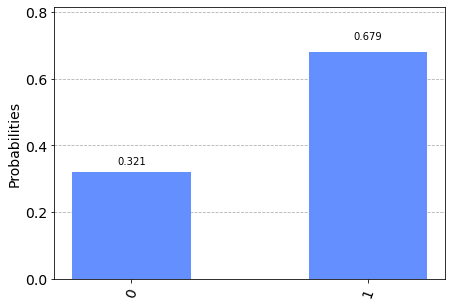

In [7]:
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

# TODO
Using this documentation of [Statevector](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html) class, prepare 

$|1\rangle$,

$|+\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle$, and 

$\frac{1}{\sqrt{2}}|0\rangle+\frac{e^{\frac{i\pi}{3}}}{\sqrt{2}}|1\rangle$ 

states. Visualize them in Bloch sphere and use simulator to validate their probabilities.

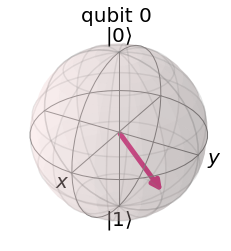

In [8]:
import qiskit
import matplotlib.pyplot as plt
import numpy as np
import warnings
from qiskit.quantum_info.states import Statevector

warnings.filterwarnings('ignore')

# example
sv = Statevector([0.6, 0.8 * (np.e ** (1j * np.pi / 3))])

sv.draw(output='bloch')